In [41]:
#필요한 모듈 불러오기
from pandas import DataFrame, Series
import numpy as np
import pandas as pd
import matplotlib  as mpl
import matplotlib.pyplot as plt
import os
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import roc_curve, auc
import statsmodels as sm
%matplotlib inline

In [2]:
#데이터 불러오기 
df = pd.read_csv('data\schedulingData.csv')
df = df.drop(df.columns[0], axis=1)   #drop first variable (index)
numrow, numcol = df.shape
df.head()

,Protocol,Compounds,InputFields,Iterations,NumPending,Hour,Day,Class
0,E,997,137,20,0,14.000000,Tue,F
1,E,97,103,20,0,13.816667,Tue,VF
2,E,101,75,10,0,13.850000,Thu,VF
3,E,93,76,20,0,10.100000,Fri,VF
4,E,100,82,20,0,10.366667,Fri,VF


In [3]:
df.describe()

,Compounds,InputFields,Iterations,NumPending,Hour
count,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000
mean,497.742092,1537.055414,29.243593,53.389287,13.733760
std,1020.173220,3650.076483,34.417441,355.956566,3.981058
min,20.000000,10.000000,10.000000,0.000000,0.016667
25%,98.000000,134.000000,20.000000,0.000000,10.900000
50%,226.000000,426.000000,20.000000,0.000000,14.016667
75%,448.000000,991.000000,20.000000,0.000000,16.600000
max,14103.000000,56671.000000,200.000000,5605.000000,23.983333


In [4]:
# getting dummies for categorical variables
X = pd.get_dummies(df[['Protocol', 'Compounds', 'InputFields', 'Iterations', 'NumPending', 'Hour', 'Day']], drop_first = True)
X.describe()

,Compounds,InputFields,Iterations,NumPending,Hour,Protocol_C,Protocol_D,Protocol_E,Protocol_F,Protocol_G,...,Protocol_L,Protocol_M,Protocol_N,Protocol_O,Day_Mon,Day_Sat,Day_Sun,Day_Thu,Day_Tue,Day_Wed
count,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000,...,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000
mean,497.742092,1537.055414,29.243593,53.389287,13.733760,0.036943,0.034403,0.022166,0.039252,0.035789,...,0.055876,0.104133,0.123759,0.134149,0.159778,0.007389,0.037174,0.166243,0.207804,0.208497
std,1020.173220,3650.076483,34.417441,355.956566,3.981058,0.188644,0.182283,0.147239,0.194216,0.185784,...,0.229709,0.305468,0.329344,0.340852,0.366443,0.085649,0.189209,0.372342,0.405783,0.406281
min,20.000000,10.000000,10.000000,0.000000,0.016667,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,98.000000,134.000000,20.000000,0.000000,10.900000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,226.000000,426.000000,20.000000,0.000000,14.016667,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,448.000000,991.000000,20.000000,0.000000,16.600000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,14103.000000,56671.000000,200.000000,5605.000000,23.983333,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
X.columns

Index(['Compounds', 'InputFields', 'Iterations', 'NumPending', 'Hour',
       'Protocol_C', 'Protocol_D', 'Protocol_E', 'Protocol_F', 'Protocol_G',
       'Protocol_H', 'Protocol_I', 'Protocol_J', 'Protocol_K', 'Protocol_L',
       'Protocol_M', 'Protocol_N', 'Protocol_O', 'Day_Mon', 'Day_Sat',
       'Day_Sun', 'Day_Thu', 'Day_Tue', 'Day_Wed'],
      dtype='object')

In [5]:
### There are a lot of zeros and the distribution is skewed. We add
### one so that we can log transform the data
X.NumPending = X.NumPending + 1
X.describe()

,Compounds,InputFields,Iterations,NumPending,Hour,Protocol_C,Protocol_D,Protocol_E,Protocol_F,Protocol_G,...,Protocol_L,Protocol_M,Protocol_N,Protocol_O,Day_Mon,Day_Sat,Day_Sun,Day_Thu,Day_Tue,Day_Wed
count,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000,...,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000
mean,497.742092,1537.055414,29.243593,54.389287,13.733760,0.036943,0.034403,0.022166,0.039252,0.035789,...,0.055876,0.104133,0.123759,0.134149,0.159778,0.007389,0.037174,0.166243,0.207804,0.208497
std,1020.173220,3650.076483,34.417441,355.956566,3.981058,0.188644,0.182283,0.147239,0.194216,0.185784,...,0.229709,0.305468,0.329344,0.340852,0.366443,0.085649,0.189209,0.372342,0.405783,0.406281
min,20.000000,10.000000,10.000000,1.000000,0.016667,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,98.000000,134.000000,20.000000,1.000000,10.900000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,226.000000,426.000000,20.000000,1.000000,14.016667,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,448.000000,991.000000,20.000000,1.000000,16.600000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,14103.000000,56671.000000,200.000000,5606.000000,23.983333,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
X['Compounds'] = np.log(X.Compounds)
X['InputFields'] = np.log(X.InputFields)
X['Iterations'] = np.log(X.Iterations)
X['NumPending'] = np.log(X.NumPending)

In [22]:
df[df.Protocol=='A']

,Protocol,Compounds,InputFields,Iterations,NumPending,Hour,Day,Class
96,A,120,338,20,3340,13.250000,Mon,F
97,A,130,397,20,160,16.800000,Fri,F
98,A,129,373,20,118,10.666667,Mon,F
99,A,141,373,20,92,9.433333,Mon,VF
100,A,134,113,20,0,9.566667,Mon,VF
101,A,135,165,20,281,9.516667,Mon,VF
102,A,130,311,20,112,9.483333,Mon,VF
103,A,135,369,20,160,9.516667,Mon,VF
104,A,139,22,20,82,9.533333,Mon,VF
105,A,152,392,10,1,15.166667,Wed,VF


In [85]:
mpl.rcParams['figure.figsize'] = (10, 10)

In [91]:
dic = {
    'VF':'brown',
    'F':'olivedrab',
    'M':'slategrey',
    'L':'orange'
    }
dic.values()

dict_values(['brown', 'olivedrab', 'slategrey', 'orange'])

In [148]:
colors = [col for col in dic.values()]
groups = [gr for gr in dic.keys()]
markers = ["o", "s", "^", "D"]
prot = np.unique(df['Protocol'])

In [99]:
prot[1]

'C'

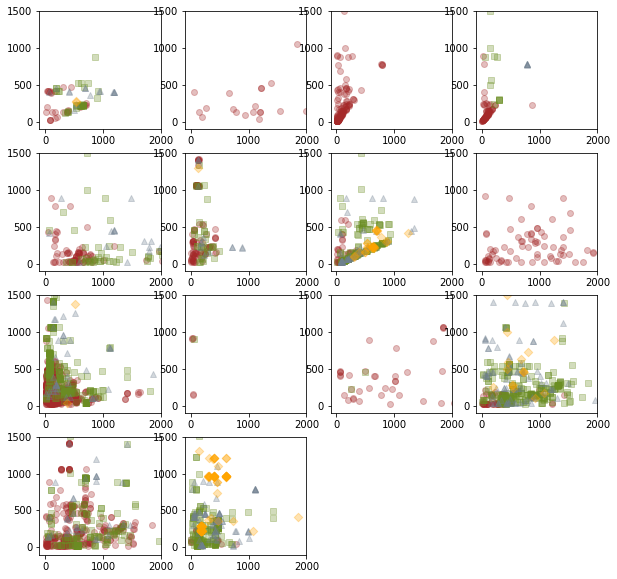

In [139]:
for i in range(14):
    plt.subplot(4,4,i+1)
    for gr, col, m in zip(groups, colors, markers):
        plt.scatter(df[(df.Protocol==prot[i])&(df.Class==gr)].InputFields, df[(df.Protocol==prot[i])&(df.Class==gr)].Compounds, c = col, label = gr, marker=m, alpha=0.3) 
    plt.xlim(-10**2, 2*10**3)
    plt.ylim(-10**2, 1.5*10**3)
plt.show()

In [9]:
from statsmodels.graphics.mosaicplot import mosaic

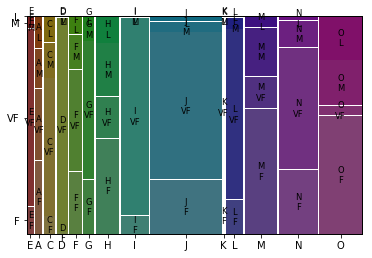

In [74]:
mosaic(df, ['Protocol', 'Class'])
plt.show()

In [150]:
np.unique(y)

array(['F', 'L', 'M', 'VF'], dtype=object)

In [140]:
## Split the data
np.random.seed(5*11+7)
y = df.iloc[:, numcol-1].values

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.2, 
                     random_state=0, 
                     stratify=y)

In [141]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

print(np.mean(X_train_std), np.std(X_train_std))

-8.247615232973642e-18 1.0


In [142]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
        
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=1) # eta0 : learning step size
ppn.fit(X_train_std, y_train)

C:\Users\renz\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=None, n_iter=40, n_jobs=1, penalty=None, random_state=1,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [143]:
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 305


In [144]:
from sklearn.metrics import accuracy_score

print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.65


In [145]:
print('Accuracy: %.2f' % ppn.score(X_test_std, y_test))

Accuracy: 0.65


In [146]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

In [147]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.savefig('images/Perceptron.png', dpi=300)
plt.show()

ValueError: X has 2 features per sample; expecting 24